In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
df_car = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/_Estudo/Asimov/input/car_price_dataset.csv')

In [44]:
df_car.head()


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [45]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [46]:
df_car['Brand'].unique()

array(['Kia', 'Chevrolet', 'Mercedes', 'Audi', 'Volkswagen', 'Toyota',
       'Honda', 'BMW', 'Hyundai', 'Ford'], dtype=object)

#1. Quais são as marcas de carros mais vendidas e suas respectivas médias de preço?

In [47]:
df_car.groupby('Brand')['Price'].mean().sort_values(ascending=False)

,Price
Brand,
Chevrolet,9015.683948
Mercedes,8980.087049
Audi,8929.373796
Volkswagen,8928.377451
Kia,8880.086066
Ford,8852.570611
Toyota,8798.184536
Hyundai,8778.279397
BMW,8704.068068


In [48]:
df_car.groupby('Mileage')['Price'].sum()

,Price
Mileage,
25,9499
74,8998
88,10298
178,13196
184,13096
...,...
299714,4805
299754,7204
299818,6303


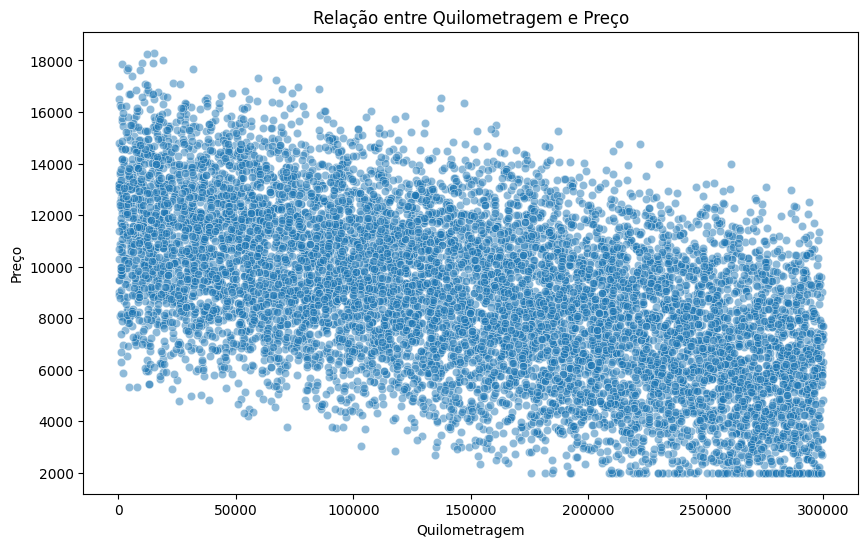

In [49]:
# Criando o gráfico de dispersão
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_car, x="Mileage", y="Price", alpha=0.5)

# Adicionando título e rótulos
plt.title("Relação entre Quilometragem e Preço")
plt.xlabel("Quilometragem")
plt.ylabel("Preço")
plt.show()


In [50]:
# Calculando a correlação entre Mileage e Price
correlation = df_car["Mileage"].corr(df_car["Price"])
print(f"Correlação entre Quilometragem e Preço: {correlation:.2f}")

Correlação entre Quilometragem e Preço: -0.55


#2. Quais tipos de combustíveis são mais comuns e como afetam o valor do veículo?

In [51]:
fuel_counts = df_car["Fuel_Type"].value_counts()
fuel_counts

,count
Fuel_Type,
Electric,2625
Diesel,2512
Hybrid,2453
Petrol,2410


<ipython-input-52-43601e4ed55d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette="viridis")


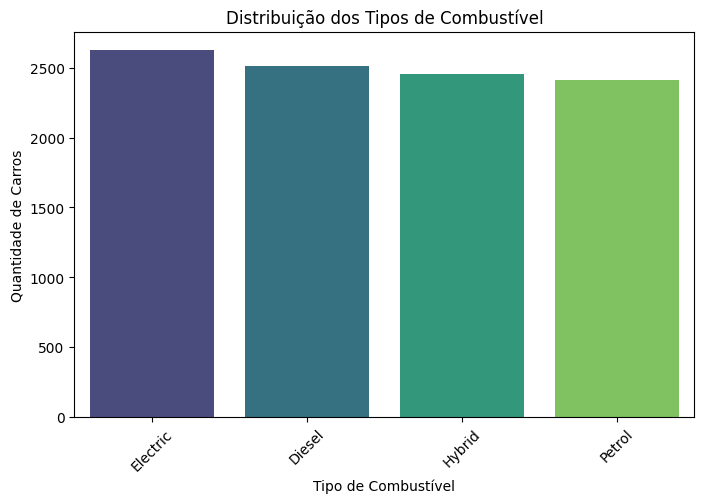

In [52]:
# Criando um gráfico de barras para visualizar a distribuição
plt.figure(figsize=(8,5))
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette="viridis")
plt.title("Distribuição dos Tipos de Combustível")
plt.xlabel("Tipo de Combustível")
plt.ylabel("Quantidade de Carros")
plt.xticks(rotation=45)
plt.show()

#3. Qual a média dos valores dos combustíveis?

In [53]:
#  Calculando a média de preço por tipo de combustível
fuel_price_mean = df_car.groupby("Fuel_Type")["Price"].mean().sort_values()
fuel_price_mean

,Price
Fuel_Type,
Petrol,8070.561826
Diesel,8117.336385
Hybrid,9113.030167
Electric,10032.220190


<ipython-input-54-2a2b28c90308>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_price_mean.index, y=fuel_price_mean.values, palette="magma")


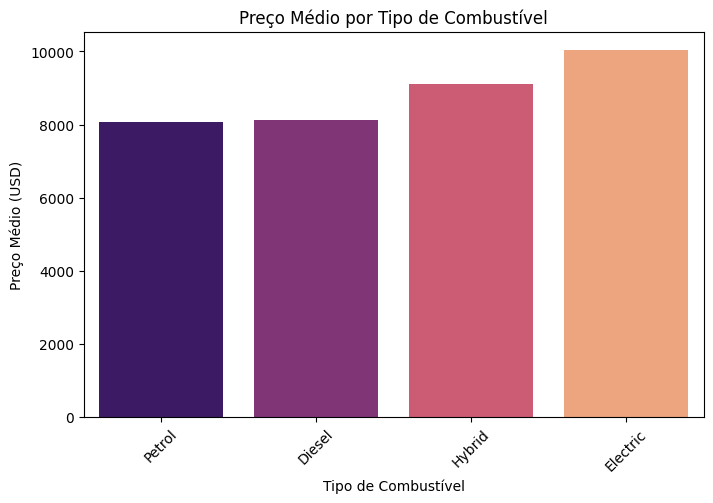

In [54]:
# Criando um gráfico de barras para visualizar os preços médios
plt.figure(figsize=(8,5))
sns.barplot(x=fuel_price_mean.index, y=fuel_price_mean.values, palette="magma")
plt.title("Preço Médio por Tipo de Combustível")
plt.xlabel("Tipo de Combustível")
plt.ylabel("Preço Médio (USD)")
plt.xticks(rotation=45)
plt.show()

#4. Os carros automáticos são mais valorizados que os manuais?

In [56]:
df_type = df_car.groupby('Transmission')['Price'].mean().sort_values(ascending=False)
df_type

,Price
Transmission,
Automatic,9938.252939
Manual,8363.426157
Semi-Automatic,8264.266385


<ipython-input-57-2902b98596fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_type.index, y=df_type.values, palette="magma")


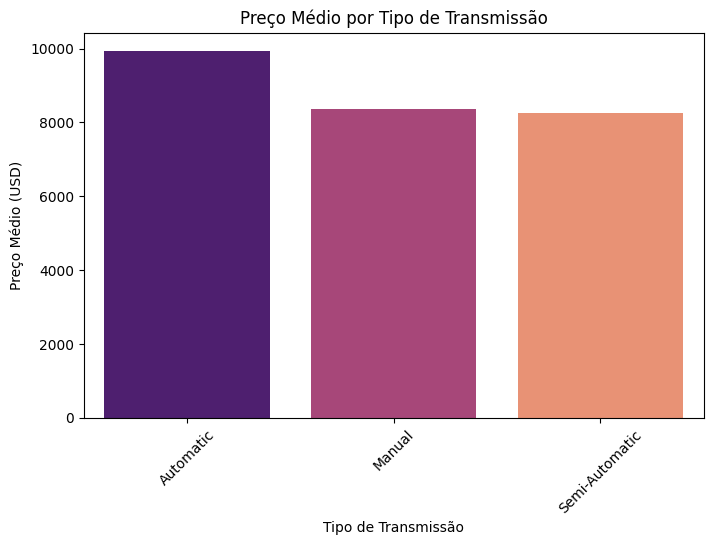

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_type.index, y=df_type.values, palette="magma")
plt.title("Preço Médio por Tipo de Transmissão")
plt.xlabel("Tipo de Transmissão")
plt.ylabel("Preço Médio (USD)")
plt.xticks(rotation=45)
plt.show()

#5 . Existe uma relação entre o número de proprietários anteriores e o preço do carro?


Para responder a isso, podemos:

1 Calcular a correlação entre o número de proprietários (Owner) e o preço (Price).

2 Criar um gráfico de dispersão para visualizar a relação.

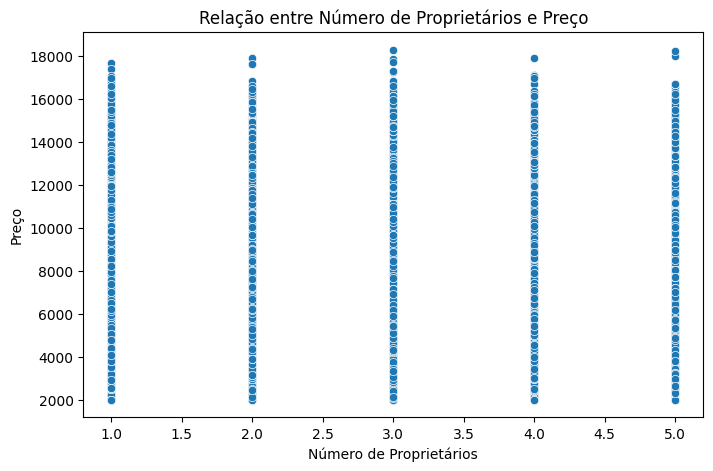

In [63]:
# Criando um gráfico de dispersão entre número de proprietários e preço
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_car , x="Owner_Count", y="Price", alpha=1)
plt.title("Relação entre Número de Proprietários e Preço")
plt.xlabel("Número de Proprietários")
plt.ylabel("Preço")
plt.show()

Como interpretar os resultados?
Correlação próxima de -1 → Quanto mais donos um carro teve, menor tende a ser seu preço.

Correlação próxima de 0 → O número de proprietários não afeta significativamente o preço.

Correlação positiva (raro) → Carros com mais donos têm preços mais altos (pouco provável).


In [65]:
# Calculando a correlação entre Owner e Price
correlation = df_car["Owner_Count"].corr(df_car["Price"])
print(f"Correlação entre Número de Proprietários e Preço: {correlation:.2f}")


Correlação entre Número de Proprietários e Preço: 0.00


#6 Quais anos de fabricação têm a maior oferta? Mostre os 10 primeiros.

In [86]:
df_car.groupby('Year')['Brand'].count().sort_values(ascending=False)
# Contagem de carros por tipo de combustível
year_counts = df_car["Year"].value_counts()
year_counts.head(10)

,count
Year,
2002,462
2011,449
2023,448
2012,437
2017,433
2010,431
2005,431
2007,430
2015,426


#7 Quais marcas têm os veículos mais duráveis em termos de quilometragem?

In [88]:
df_brand = df_car.groupby('Brand')['Mileage'].mean().sort_values(ascending=False)
df_brand.head(10)

,Mileage
Brand,
Honda,152424.894945
Audi,150974.284200
Ford,150650.291031
BMW,149980.309309
Hyundai,149836.904523
Kia,149408.309426
Toyota,149176.456701
Volkswagen,147367.759804
Chevrolet,146740.873380


<ipython-input-90-0abd925e28a9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_brand.index, y=df_brand.values, palette="magma")


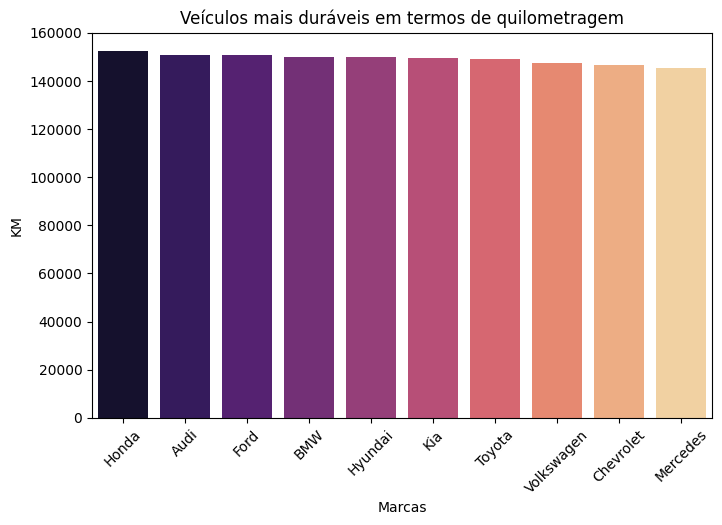

In [90]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_brand.index, y=df_brand.values, palette="magma")
plt.title("Veículos mais duráveis em termos de quilometragem")
plt.xlabel("Marcas")
plt.ylabel("KM")
plt.xticks(rotation=45)
plt.show()

In [94]:
df_car.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [114]:
df_car['Year'].unique()

array([2020, 2012, 2023, 2003, 2007, 2010, 2001, 2014, 2005, 2013, 2009,
       2004, 2017, 2006, 2000, 2021, 2018, 2016, 2011, 2022, 2008, 2015,
       2002, 2019])

# 8. Quais carros possuem a melhor relação custo-benefício considerando ano, quilometragem e preço? Pegar dos 5 últimos anos.

In [131]:
# Criar uma nova coluna 'Custo-Benefício'
df_car['Custo-Benefício'] = df_car['Price'] / (df_car['Year'] * (1 + df_car['Mileage'] / 10000))

# Ordenar o DataFrame pelo 'Custo-Benefício' em ordem crescente
custo_beneficio = df_car.sort_values('Custo-Benefício')
custo_beneficio_5_anos = custo_beneficio.query('Year >= 2018').head(10).sort_values('Custo-Benefício', ascending=True)
custo_beneficio_5_anos


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Custo-Benefício
8085,Kia,Rio,2018,1.4,Petrol,Semi-Automatic,292668,4,2,5046,0.082615
9243,Ford,Fiesta,2018,2.0,Petrol,Manual,299652,3,2,5506,0.088113
8678,Honda,Accord,2020,1.2,Diesel,Manual,293337,4,2,5433,0.088667
3072,Audi,Q5,2019,1.5,Petrol,Manual,285575,4,2,5588,0.093638
4311,Chevrolet,Equinox,2018,2.1,Diesel,Manual,291296,4,1,5774,0.094965
3627,Volkswagen,Passat,2018,2.5,Petrol,Manual,298898,3,2,6022,0.096606
1887,Honda,Civic,2021,1.7,Diesel,Semi-Automatic,299534,3,1,6109,0.097655
1175,Chevrolet,Equinox,2020,1.5,Diesel,Manual,285725,5,4,5885,0.098516
3893,Mercedes,GLA,2022,1.1,Petrol,Manual,289633,4,1,6007,0.099149
7539,Honda,Civic,2018,1.6,Petrol,Manual,272408,5,5,5651,0.099158


# Desconsiderando o ano e pegando o mais em barato.

In [132]:
custo_beneficio.head(10)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Custo-Benefício
9851,Volkswagen,Passat,2000,2.2,Hybrid,Manual,299016,3,4,2000,0.032361
4880,Ford,Explorer,2000,1.4,Electric,Semi-Automatic,298968,5,1,2000,0.032366
7998,Hyundai,Sonata,2005,1.1,Petrol,Manual,297669,2,1,2000,0.032421
2807,Toyota,Corolla,2003,2.7,Diesel,Manual,297911,3,2,2000,0.032428
6242,Mercedes,GLA,2004,2.1,Petrol,Manual,297401,4,3,2000,0.032466
4055,Honda,Civic,2007,1.2,Diesel,Manual,296829,5,5,2000,0.032478
232,BMW,X5,2002,2.9,Petrol,Manual,296864,4,2,2000,0.032555
7325,Audi,Q5,2006,1.3,Petrol,Semi-Automatic,296079,4,4,2000,0.032574
2063,Mercedes,GLA,2003,1.3,Petrol,Manual,294888,5,2,2000,0.032750
9150,Kia,Rio,2003,2.2,Petrol,Manual,294310,3,2,2000,0.032812


In [143]:
custo_beneficio.query('`Custo-Benefício` == `Custo-Benefício`.max()')

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Custo-Benefício
9845,Kia,Rio,2015,4.9,Electric,Automatic,446,5,1,16991,8.072236
